ConcreteStrengthData

Target variable: Strength
    
Problem statement: predict the strength  of  concrete based on its material composition
Analyze which ingredient affects the strength and which one does not matter much

Data Source= UCI ML

Exploring the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading the dataset
ConcreteStrengthData=pd.read_csv('D:\\DS\\Python\\Python Datasets Assignment2\\Python Datasets\\Regression Datasets\\ConcreteStrengthData.csv')
print('Shape before deleting duplicate values:', ConcreteStrengthData.shape)

# Removing duplicate rows if any
ConcreteStrengthData=ConcreteStrengthData.drop_duplicates()
print('Shape After deleting duplicate values:', ConcreteStrengthData.shape)

ConcreteStrengthData.head()
# Start observing the Quantitative/Categorical/Qualitative variables

Shape before deleting duplicate values: (1030, 9)
Shape After deleting duplicate values: (1005, 9)


CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0             540.0               0.0              0.0           162.0   
1             540.0               0.0              0.0           162.0   
2             332.5             142.5              0.0           228.0   
3             332.5             142.5              0.0           228.0   
4             198.6             132.4              0.0           192.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        2.5                    1040.0   
1                        2.5                    1055.0   
2                        0.0                     932.0   
3                        0.0                     932.0   
4                        0.0                     978.4   

   FineAggregateComponent  AgeInDays  Strength  
0                   676.0         28     79.99  
1                   676.0         28     61.89  
2                   594.0        270     40.27  
3                   594.0        365     41.05  
4                   825.5        360     44.30

In [3]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
ConcreteStrengthData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1005 non-null   float64
 1   BlastFurnaceSlag           1005 non-null   float64
 2   FlyAshComponent            1005 non-null   float64
 3   WaterComponent             1005 non-null   float64
 4   SuperplasticizerComponent  1005 non-null   float64
 5   CoarseAggregateComponent   1005 non-null   float64
 6   FineAggregateComponent     1005 non-null   float64
 7   AgeInDays                  1005 non-null   int64  
 8   Strength                   1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [4]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
ConcreteStrengthData.nunique()

CementComponent              278
BlastFurnaceSlag             185
FlyAshComponent              156
WaterComponent               195
SuperplasticizerComponent    111
CoarseAggregateComponent     284
FineAggregateComponent       302
AgeInDays                     14
Strength                     845
dtype: int64

In [5]:
# Looking at the statistial distribution of the data
# Observe that the min values of Age and KM column is an outlier
ConcreteStrengthData.describe(include='all')

CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
count       1005.000000       1005.000000      1005.000000     1005.000000   
mean         278.631343         72.043483        55.536318      182.075323   
std          104.344261         86.170807        64.207969       21.339334   
min          102.000000          0.000000         0.000000      121.800000   
25%          190.700000          0.000000         0.000000      166.600000   
50%          265.000000         20.000000         0.000000      185.700000   
75%          349.000000        142.500000       118.300000      192.900000   
max          540.000000        359.400000       200.100000      247.000000   

       SuperplasticizerComponent  CoarseAggregateComponent  \
count                1005.000000               1005.000000   
mean                    6.033234                974.376816   
std                     5.919967                 77.579667   
min                     0.000000                801.000000   
25%                     0.000000                932.000000   
50%                     6.100000                968.000000   
75%                    10.000000               1031.000000   
max                    32.200000               1145.000000   

       FineAggregateComponent    AgeInDays     Strength  
count             1005.000000  1005.000000  1005.000000  
mean               772.688259    45.856716    35.250378  
std                 80.340435    63.734692    16.284815  
min                594.000000     1.000000     2.330000  
25%                724.300000     7.000000    23.520000  
50%                780.000000    28.000000    33.800000  
75%                822.200000    56.000000    44.870000  
max                992.600000   365.000000    82.600000

Grouping Continous and Categorical cols

In [6]:
Continous_Cols=['CementComponent ','BlastFurnaceSlag','FlyAshComponent','WaterComponent',
                'SuperplasticizerComponent','CoarseAggregateComponent','FineAggregateComponent']
Categorical_cols=['AgeInDays']

Observe the distribution of target variable

-If target variable's distribution is too skewed then the predictive modeling will not be possible.
-Bell curve is desirable but slightly positive skew or negative skew is also fine
-When performing Regression, make sure there is no Zeros in the target variable, as it will cause divide by Zero exeption later on for accuracy calculation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D65579D08>]],
      dtype=object)

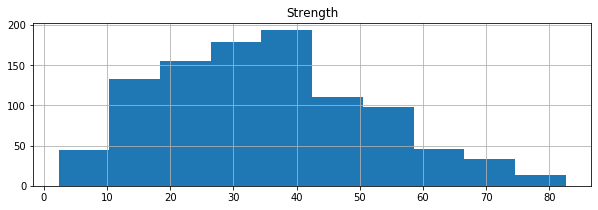

In [7]:
%matplotlib inline
ConcreteStrengthData.hist(['Strength'], figsize=[10,3])

Visualize distribution of all the numeric Predictor variables in the data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D65AF6308>,
      dtype=object)

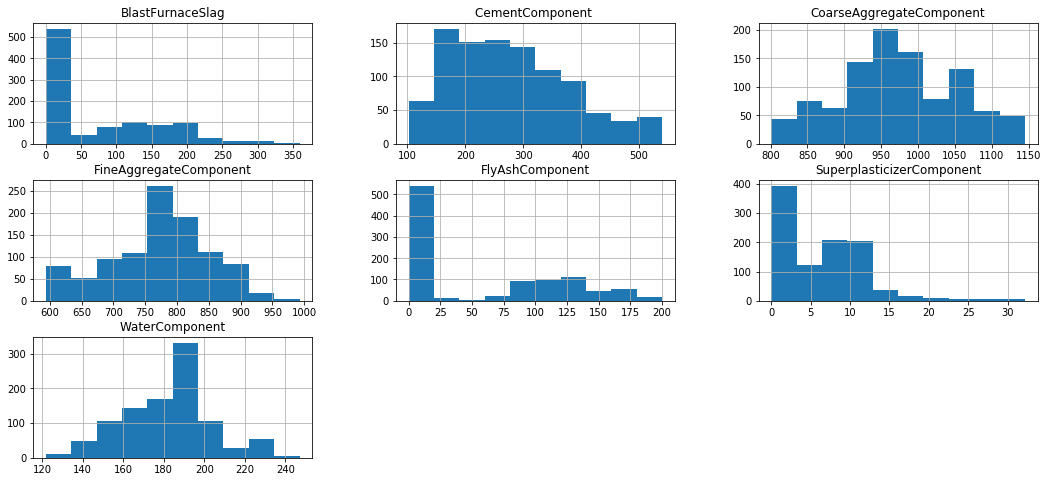

In [8]:
# Plotting histograms of multiple columns together
ConcreteStrengthData.hist(Continous_Cols, figsize=(18,8))

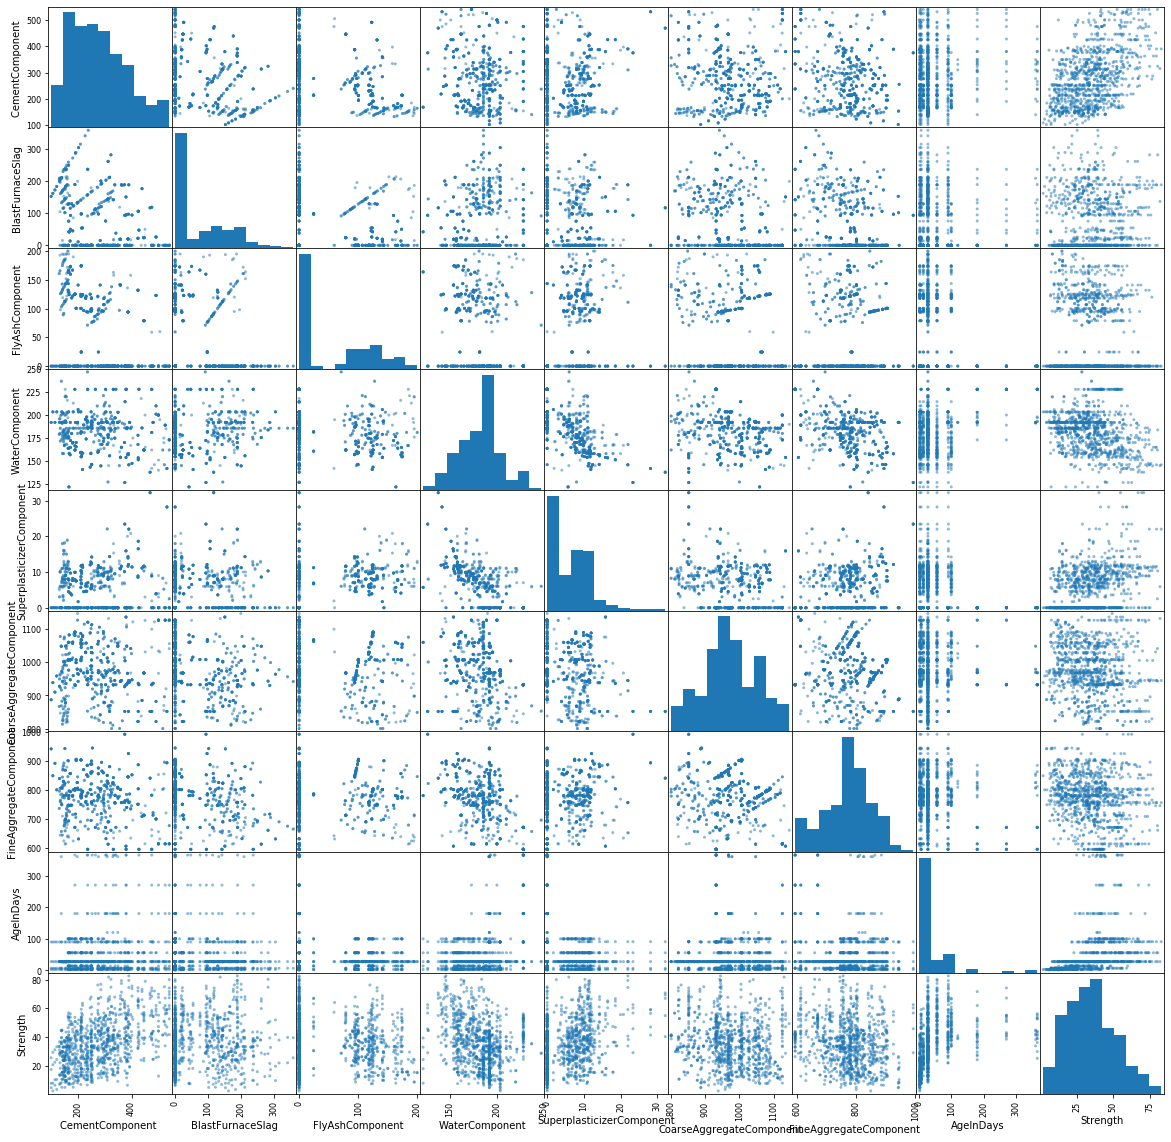

In [9]:
# Creating histograms and scatter plots for all the numeric columns in data
# Storing the returned result array into a variable
# Observe the histograms for all variables and look for extreme skewness
Fulldataplot=pd.plotting.scatter_matrix(ConcreteStrengthData,figsize=(20,20))

In [10]:
#Bi Variate Analysis
GroupedData=ConcreteStrengthData.groupby(['AgeInDays'])

# Printing the aggregated values
#GroupedData.size()
#GroupedData.sum()
#GroupedData.count()
GroupedData.mean()

CementComponent   BlastFurnaceSlag  FlyAshComponent  \
AgeInDays                                                        
1                442.500000          0.000000         0.000000   
3                282.667442         62.491473        59.379845   
7                310.272131         91.150000        13.057377   
14               246.182258         18.590323        97.854839   
28               264.019332         85.660143        63.694511   
56               288.744186         49.367442        89.988372   
90               284.140741         88.524074         0.000000   
91               393.647059        146.717647         0.000000   
100              220.909615         22.165385       116.673077   
120              330.000000          0.000000         0.000000   
180              331.334615         49.319231         0.000000   
270              376.884615         72.346154         0.000000   
360              267.533333         56.966667         0.000000   
365              319.321429         67.178571         0.000000   

           WaterComponent  SuperplasticizerComponent  \
AgeInDays                                              
1              193.000000                   0.000000   
3              176.803101                   6.347287   
7              184.077049                   3.412295   
14             173.390323                   6.679032   
28             183.326014                   6.934129   
56             167.861628                   9.640698   
90             200.768519                   0.000000   
91             157.005882                  15.623529   
100            169.446154                   7.963462   
120            192.000000                   0.000000   
180            207.038462                   0.000000   
270            218.615385                   0.000000   
360            191.833333                   0.000000   
365            218.642857                   0.000000   

           CoarseAggregateComponent  FineAggregateComponent   Strength  
AgeInDays                                                               
1                       1045.500000              688.000000   9.455000  
3                        979.944961              795.638760  18.378140  
7                        986.614754              766.354098  25.182049  
14                      1023.909677              800.119355  28.750968  
28                       956.267064              763.806205  36.429570  
56                       983.819767              797.919767  50.715233  
90                       966.137037              758.662963  40.480370  
91                       922.258824              800.576471  68.675882  
100                     1025.296154              809.450000  47.668846  
120                     1031.000000              820.000000  39.646667  
180                      979.900000              725.438462  41.730385  
270                      976.538462              627.615385  51.272308  
360                      998.066667              828.233333  40.696667  
365                      942.285714              690.071429  43.557857

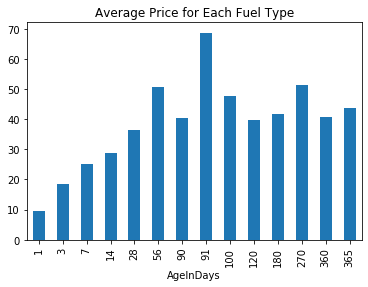

In [11]:
# Creating the graph with Strength
GroupedData.mean()['Strength'].plot(kind='bar', title='Average Price for Each Fuel Type')

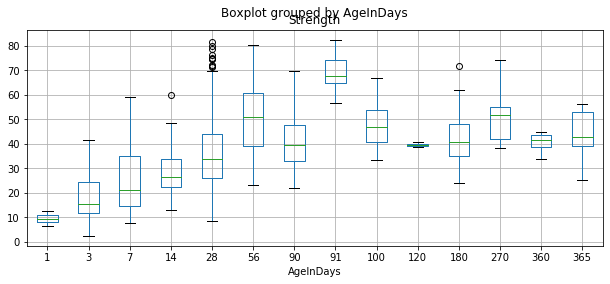

In [12]:
#Box plot

ConcreteStrengthData.boxplot(column='Strength', by='AgeInDays', figsize=(10,4))

Statistical Feature Selection (Continuous Vs Continuous) using Correlation Marix
Finding the top numeric continuous variables which correlate with the target variable

In [13]:
# Creating the correlation matrix
Correlationdata=ConcreteStrengthData.corr()
Correlationdata

CementComponent   BlastFurnaceSlag  \
CementComponent                    1.000000         -0.303324   
BlastFurnaceSlag                  -0.303324          1.000000   
FlyAshComponent                   -0.385610         -0.312352   
WaterComponent                    -0.056625          0.130262   
SuperplasticizerComponent          0.060906          0.019800   
CoarseAggregateComponent          -0.086205         -0.277559   
FineAggregateComponent            -0.245375         -0.289685   
AgeInDays                          0.086348         -0.042759   
Strength                           0.488283          0.103374   

                           FlyAshComponent  WaterComponent  \
CementComponent                  -0.385610       -0.056625   
BlastFurnaceSlag                 -0.312352        0.130262   
FlyAshComponent                   1.000000       -0.283314   
WaterComponent                   -0.283314        1.000000   
SuperplasticizerComponent         0.414213       -0.646946   
CoarseAggregateComponent         -0.026468       -0.212480   
FineAggregateComponent            0.090262       -0.444915   
AgeInDays                        -0.158940        0.279284   
Strength                         -0.080648       -0.269624   

                           SuperplasticizerComponent  \
CementComponent                             0.060906   
BlastFurnaceSlag                            0.019800   
FlyAshComponent                             0.414213   
WaterComponent                             -0.646946   
SuperplasticizerComponent                   1.000000   
CoarseAggregateComponent                   -0.241721   
FineAggregateComponent                      0.207993   
AgeInDays                                  -0.194076   
Strength                                    0.344209   

                           CoarseAggregateComponent  FineAggregateComponent  \
CementComponent                           -0.086205               -0.245375   
BlastFurnaceSlag                          -0.277559               -0.289685   
FlyAshComponent                           -0.026468                0.090262   
WaterComponent                            -0.212480               -0.444915   
SuperplasticizerComponent                 -0.241721                0.207993   
CoarseAggregateComponent                   1.000000               -0.162187   
FineAggregateComponent                    -0.162187                1.000000   
AgeInDays                                 -0.005264               -0.156572   
Strength                                  -0.144717               -0.186448   

                           AgeInDays  Strength  
CementComponent             0.086348  0.488283  
BlastFurnaceSlag           -0.042759  0.103374  
FlyAshComponent            -0.158940 -0.080648  
WaterComponent              0.279284 -0.269624  
SuperplasticizerComponent  -0.194076  0.344209  
CoarseAggregateComponent   -0.005264 -0.144717  
FineAggregateComponent     -0.156572 -0.186448  
AgeInDays                   1.000000  0.337367  
Strength                    0.337367  1.000000

In [14]:
# Filtering only those columns where absolute correlation > 0.5 with Strength
Correlationdata['Strength'][abs(Correlationdata['Strength'])>0.5]

Strength    1.0
Name: Strength, dtype: float64

Statistical Feature Selection (Continuous Vs Categorical) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

In [15]:
#Creating user defined ANOVA function for feature selection process
def functionANova(inpdata, targetvar, Predictors):
    
    from scipy.stats import f_oneway
    Var=[]
    Notimp=[]
    for i in Predictors:
        CategoryGroupLists=inpdata.groupby(i)[targetvar].apply(list)
        AnovaResults=f_oneway(*CategoryGroupLists)
        np.set_printoptions(suppress=True)
        
        if(AnovaResults[1]<=0.05):
            Var.append(i)    
        else:
            Notimp.append(i)
            
    print("Selected Variables",Var)
    print("Not Selected Variables",Notimp)

In [16]:
#Calling the Function
functionANova(inpdata=ConcreteStrengthData, targetvar='Strength', Predictors=Continous_Cols)

Selected Variables ['CementComponent ', 'BlastFurnaceSlag', 'WaterComponent', 'SuperplasticizerComponent', 'CoarseAggregateComponent', 'FineAggregateComponent']
Not Selected Variables ['FlyAshComponent']


Data Pre-processing for Machine Learning

In [17]:
# Finding out how many missing values are present in each column
ConcreteStrengthData.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

Treating Outliers

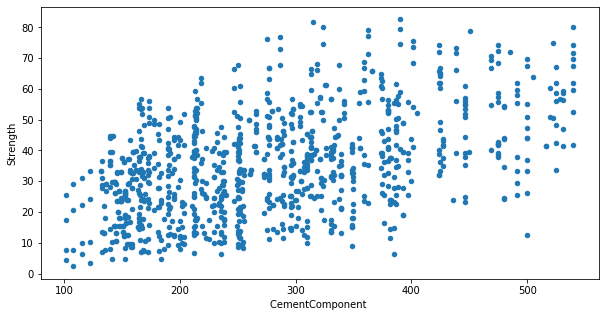

In [18]:
# Looking at the relation with the target column before removing outlier
ConcreteStrengthData.plot.scatter(x='CementComponent ',y='Strength', marker='o', figsize=(10,5))

In [19]:
# Removing the outlier values from data using filter conditions
filtercond1=ConcreteStrengthData['CementComponent ']>370
filtercond2=ConcreteStrengthData['Strength']<14

print(ConcreteStrengthData[filtercond1 & filtercond2])

rowstodel=ConcreteStrengthData[filtercond1 & filtercond2].index
ConcreteStrengthData=ConcreteStrengthData.drop(rowstodel)


     CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
746             500.0               0.0              0.0           200.0   
763             385.0               0.0              0.0           186.0   
774             382.0               0.0              0.0           186.0   

     SuperplasticizerComponent  CoarseAggregateComponent  \
746                        0.0                    1125.0   
763                        0.0                     966.0   
774                        0.0                    1111.0   

     FineAggregateComponent  AgeInDays  Strength  
746                   613.0          1     12.64  
763                   763.0          1      6.27  
774                   784.0          7     11.47  


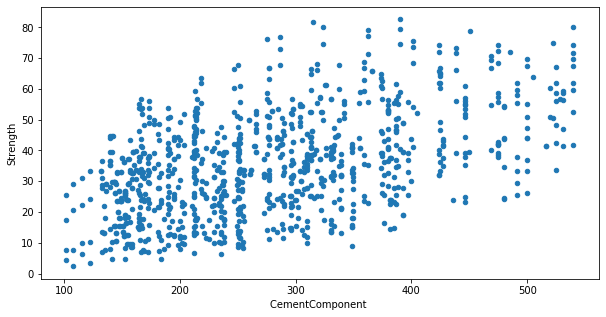

In [20]:
# Plotting again to see the effect of removing outliers
ConcreteStrengthData.plot.scatter(x='CementComponent ',y='Strength', marker='o', figsize=(10,5))

In [21]:
# Correlation increases after outlier removal in data
ConcreteStrengthData[['CementComponent ','Strength']].corr()

CementComponent   Strength
CementComponent           1.000000  0.497903
Strength                  0.497903  1.000000

Data Pre-Processing: Converting Categorical data to numeric

In [22]:
# CarPricesData has only one string categorical variable FuelType
# Hence using get_dummies function
ConcreteStrengthDataNumeric=pd.get_dummies(ConcreteStrengthData)
ConcreteStrengthDataNumeric

CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0                540.0               0.0              0.0           162.0   
1                540.0               0.0              0.0           162.0   
2                332.5             142.5              0.0           228.0   
3                332.5             142.5              0.0           228.0   
4                198.6             132.4              0.0           192.0   
...                ...               ...              ...             ...   
1025             276.4             116.0             90.3           179.6   
1026             322.2               0.0            115.6           196.0   
1027             148.5             139.4            108.6           192.7   
1028             159.1             186.7              0.0           175.6   
1029             260.9             100.5             78.3           200.6   

      SuperplasticizerComponent  CoarseAggregateComponent  \
0                           2.5                    1040.0   
1                           2.5                    1055.0   
2                           0.0                     932.0   
3                           0.0                     932.0   
4                           0.0                     978.4   
...                         ...                       ...   
1025                        8.9                     870.1   
1026                       10.4                     817.9   
1027                        6.1                     892.4   
1028                       11.3                     989.6   
1029                        8.6                     864.5   

      FineAggregateComponent  AgeInDays  Strength  
0                      676.0         28     79.99  
1                      676.0         28     61.89  
2                      594.0        270     40.27  
3                      594.0        365     41.05  
4                      825.5        360     44.30  
...                      ...        ...       ...  
1025                   768.3         28     44.28  
1026                   813.4         28     31.18  
1027                   780.0         28     23.70  
1028                   788.9         28     32.77  
1029                   761.5         28     32.40  

[1002 rows x 9 columns]

In [23]:
ConcreteStrengthDataNumeric.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

Saving the processed data as pickle file

In [24]:
ConcreteStrengthDataNumeric.to_pickle('ConcreteStrengthDataNumeric.pkl')

Machine Learning: Splitting the data into Training and Testing sample

Simple Linear Regression

-When only one predictor is used

In [25]:
#Selected Target Variable and Predictor variable
Targetvariable='Strength'
Predictor=['CementComponent ']
x=ConcreteStrengthDataNumeric[Predictor]
y=ConcreteStrengthDataNumeric[Targetvariable]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=143)

In [26]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
Regmodel=LinearRegression()
# Printing all the parameters of Linear regression
print(Regmodel)
# Creating the model on Training Data
LREG=Regmodel.fit(x_train, y_train)
prediction=LREG.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 value :',metrics.r2_score(y_train, LREG.predict(x_train)) )
      
# Measuring accuracy on Testing Data
print("The Accuracy:", 100 - (np.mean(np.abs(y_test -prediction)/y_test*100)))
# Printing some sample values of prediction  
Testingdataframe=pd.DataFrame(data=x_test, columns=Predictor)
Testingdataframe[Targetvariable]=y_test
Testingdataframe[('Predicted'+ Targetvariable)]=np.round(prediction)
Testingdataframe.head()
# Measuring Average Percentage Error
Testingdataframe['APE']=abs(Testingdataframe[Targetvariable] -Testingdataframe[('Predicted'+ Targetvariable)])/Testingdataframe[Targetvariable]*100
MAPE=np.mean(Testingdataframe['APE'])
MedAPE=np.median(Testingdataframe['APE'])

MeanAccuracy=100-MAPE
MedianAccuracy=100-MedAPE
print('MeanAccuracy',MeanAccuracy)
print('MedianAccuracy',MedianAccuracy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 value : 0.2790796327876186
The Accuracy: 49.581989430254495
MeanAccuracy 49.683071368966424
MedianAccuracy 71.1159737417943


Visualizing the line of best fit

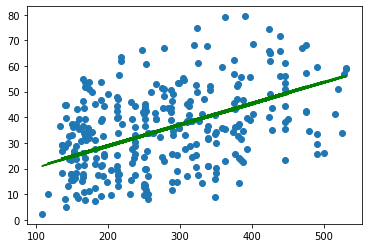

In [27]:
import matplotlib.pyplot as plt
plt.scatter(x=Testingdataframe[Predictor],y=Testingdataframe[Targetvariable])
plt.plot(Testingdataframe[Predictor],Testingdataframe[('Predicted'+ Targetvariable)], color='green')

Sampling with multiple Predictor columns for all other algorithms

In [28]:
#Selected Target Variable and Predictor variable
Targetvariable='Strength'
Predictors=['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength']
x=ConcreteStrengthDataNumeric[Predictors]
y=ConcreteStrengthDataNumeric[Targetvariable]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=143)

Multiple Linear Regression

-When multiple predictors are used

In [29]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
Regmodel=LinearRegression()
# Printing all the parameters of Linear regression
print(Regmodel)
# Creating the model on Training Data
LREG=Regmodel.fit(x_train, y_train)
prediction=LREG.predict(x_test)

from sklearn import metrics
#to find the goodness in the fit
print('R2 value :',metrics.r2_score(y_train, LREG.predict(x_train)) )
      
# Measuring accuracy on Testing Data
print("The Accuracy:", 100 - (np.mean(np.abs(y_test -prediction)/y_test*100)))
# Printing some sample values of prediction    
Testingdataframe=pd.DataFrame(data=x_test, columns=Predictors)
Testingdataframe[Targetvariable]=y_test
Testingdataframe[('Predicted'+ Targetvariable)]=np.round(prediction)
Testingdataframe.head()
#Measuring Average Percentage Error
Testingdataframe['APE']=abs(Testingdataframe[Targetvariable] -Testingdataframe[('Predicted'+ Targetvariable)])/Testingdataframe[Targetvariable]*100
MAPE=np.mean(Testingdataframe['APE'])
MedAPE=np.median(Testingdataframe['APE'])

MeanAccuracy=100-MAPE
MedianAccuracy=100-MedAPE
print('MeanAccuracy',MeanAccuracy)
print('MedianAccuracy',MedianAccuracy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 value : 1.0
The Accuracy: 99.99999999999993
MeanAccuracy 98.99987615597763
MedianAccuracy 99.23916639100231


In [30]:
# Suppress the scientific notation in values
np.set_printoptions(suppress=True)

In [31]:
print('Slope',LREG.coef_)
print('Intercept',LREG.intercept_)

Slope [ 0.  0.  0.  0. -0.  0.  0.  0.  1.]
Intercept -4.192202140984591e-13


Analyzing the errors and outliers in the data

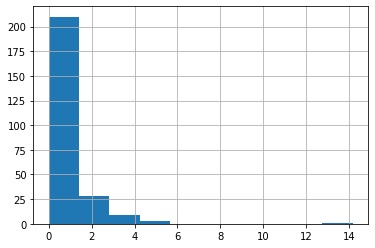

In [32]:
Testingdataframe['APE'].hist()

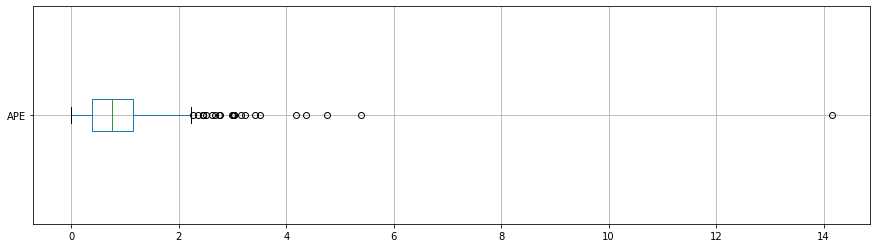

In [33]:
Testingdataframe.boxplot(column='APE',figsize=(15,4), vert=False)

Decision Tree

R2 value: 0.9984959758124046
Accuracy of the data: 97.43733123806467
MeanAccuracy 97.27369974571964
MedianAccuracy 98.59594383775351


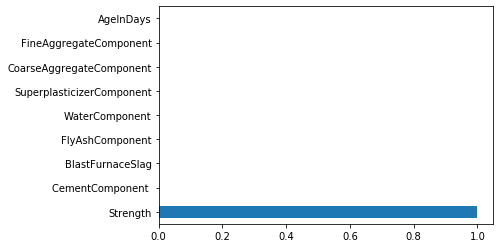

In [34]:
from sklearn.tree import DecisionTreeRegressor
Regmodel=DecisionTreeRegressor(max_depth=5, criterion='mse')
# Creating the model on Training Data
DT=Regmodel.fit(x_train,y_train)
prediction=DT.predict(x_test)
# Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 value:',metrics.r2_score(y_train, DT.predict(x_train)))
# Measuring accuracy on Testing Data
print('Accuracy of the data:', 100 - (np.mean(np.abs(y_test - prediction)/y_test)*100))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=x_test, columns=Predictors)
Testingdataframe[Targetvariable]=y_test
Testingdataframe[('Predicted'+ Targetvariable)]=np.round(prediction)
Testingdataframe.head()
#Measuring Average Percentage Error
Testingdataframe['APE']=abs(Testingdataframe[Targetvariable] -Testingdataframe[('Predicted'+ Targetvariable)])/Testingdataframe[Targetvariable]*100
MAPE= np.mean(Testingdataframe['APE'])
MedAPE=np.median(Testingdataframe['APE'])

MeanAccuracy=100-MAPE
MedianAccuracy=100-MedAPE
print('MeanAccuracy',MeanAccuracy)
print('MedianAccuracy',MedianAccuracy)

In [35]:
#adding graphviz path
import os 
os.environ['PATH'] += os.pathsep +'C:\\Users\\Goku\\anaconda3\\Library\\bin\\graphviz'

digraph Tree {
node [shape=box] ;
0 [label="Strength <= 36.395\nmse = 270.603\nsamples = 751\nvalue = 35.21"] ;
1 [label="Strength <= 21.395\nmse = 69.608\nsamples = 408\nvalue = 22.979"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Strength <= 13.9\nmse = 17.21\nsamples = 159\nvalue = 13.935"] ;
1 -> 2 ;
3 [label="Strength <= 10.125\nmse = 6.515\nsamples = 79\nvalue = 10.498"] ;
2 -> 3 ;
4 [label="Strength <= 7.17\nmse = 3.067\nsamples = 32\nvalue = 7.91"] ;
3 -> 4 ;
5 [label="mse = 1.489\nsamples = 10\nvalue = 5.785"] ;
4 -> 5 ;
6 [label="mse = 0.798\nsamples = 22\nvalue = 8.876"] ;
4 -> 6 ;
7 [label="Strength <= 11.905\nmse = 1.201\nsamples = 47\nvalue = 12.259"] ;
3 -> 7 ;
8 [label="mse = 0.276\nsamples = 15\nvalue = 10.875"] ;
7 -> 8 ;
9 [label="mse = 0.315\nsamples = 32\nvalue = 12.908"] ;
7 -> 9 ;
10 [label="Strength <= 17.39\nmse = 4.588\nsamples = 80\nvalue = 17.329"] ;
2 -> 10 ;
11 [label="Strength <= 15.965\nmse = 0.772\nsamples = 41\nvalue = 15.

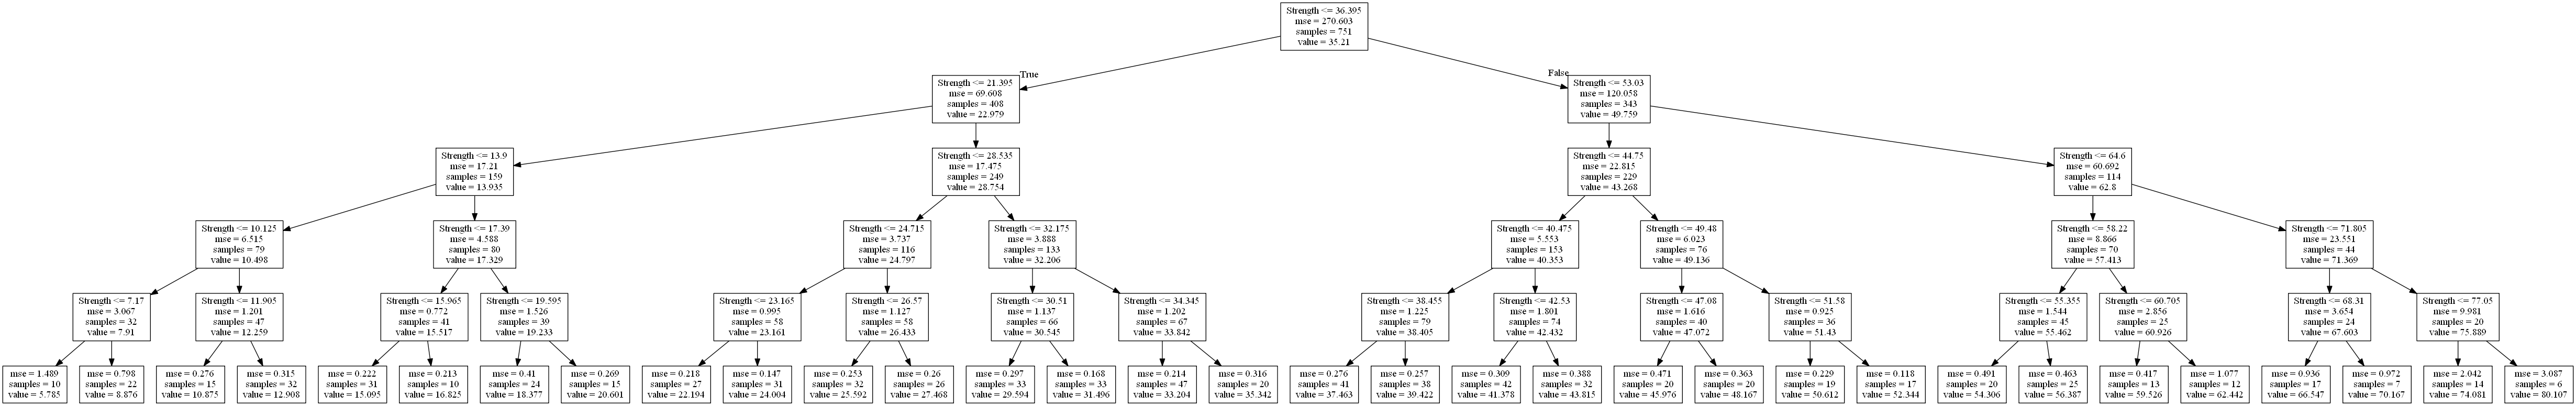

In [36]:
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT dat
dot_data=tree.export_graphviz(Regmodel, out_file=None, feature_names=Predictors, class_names=Targetvariable)
# printing the rules
print(dot_data)

#draw graph
graph=pydotplus.graph_from_dot_data(dot_data)

#show graph
Image(graph.create_png())

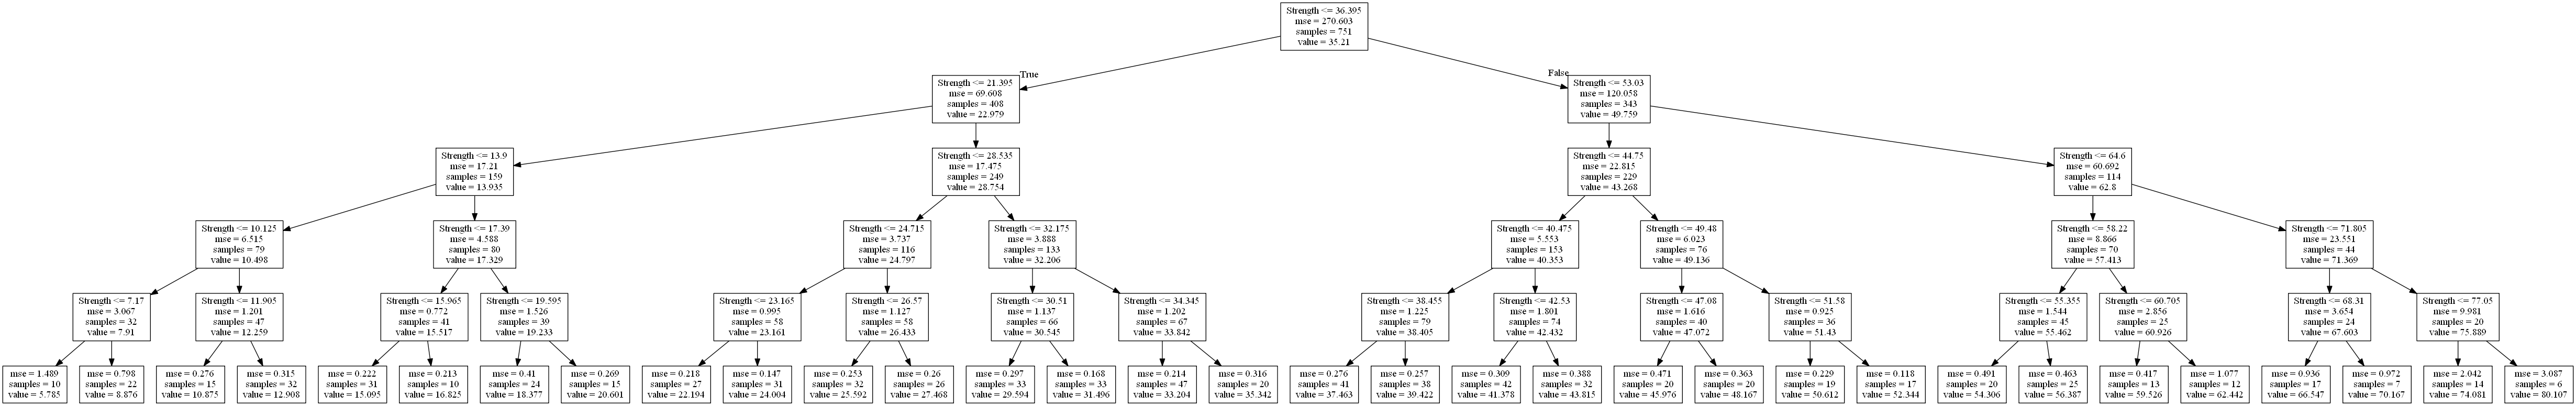

In [37]:
#saving the Decission Tree Image
DTConcreteStrengthData=Image(graph.create_png())
DTConcreteStrengthData

In [38]:
graph.write_jpg("DTConcreteStrengthData.jpg")

True

Random Forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
The R2 value: 0.9999814776008904
The Accuracy: 99.41900634451959
MeanAccuracy 98.68000985989002
MedianAccuracy 99.23664122137406


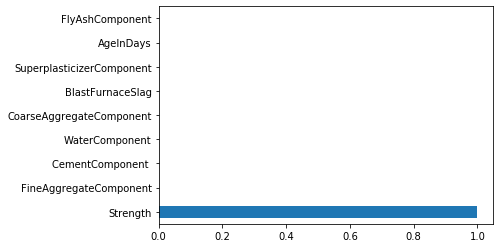

In [39]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
Regmodel=RandomForestRegressor(max_depth=10,n_estimators=500 ,criterion='mse')

print(Regmodel)
# Creating the model on Training Data
RF=Regmodel.fit(x_train, y_train)
prediction=RF.predict(x_test)
# Measuring Goodness of fit in Training data
from sklearn import metrics
print('The R2 value:',metrics.r2_score(y_train, RF.predict(x_train)))
# Measuring accuracy on Testing Data
print('The Accuracy:', 100- np.mean(np.abs(y_test - prediction)/y_test*100))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=x_test, columns= Predictors)
Testingdataframe[Targetvariable]=y_test
Testingdataframe[('Predicted'+ Targetvariable)]=np.round(prediction)
#Measuring Average Percentage Error
Testingdataframe['APE']=abs(Testingdataframe[Targetvariable]-Testingdataframe[('Predicted'+ Targetvariable)])/Testingdataframe[Targetvariable]*100
MAPE=np.mean(Testingdataframe['APE'])
MedianAPE=np.median(Testingdataframe['APE'])

MeanAccuracy=100 - MAPE
MedianAccuracy=100 - MedianAPE
print('MeanAccuracy',MeanAccuracy)
print('MedianAccuracy',MedianAccuracy)
 

Plotting a single Decision tree out of Random Forest

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.67699 to fit



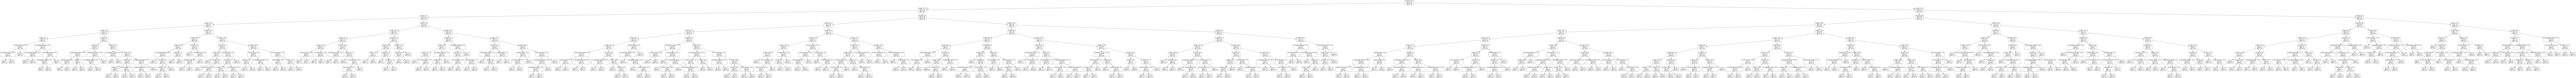

In [40]:
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT data for the 6th Decision Tree in Random Forest
dot_data=tree.export_graphviz(Regmodel.estimators_[25], out_file=None, feature_names=Predictors, class_names=Targetvariable)
# Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

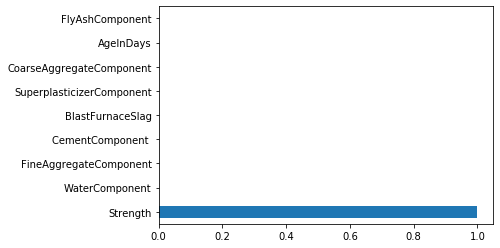

In [41]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(max_depth=10)
Regmodel=AdaBoostRegressor(n_estimators=500, learning_rate=0.3, base_estimator=DTR)

print(Regmodel)
# Creating the model on Training Data
AB=Regmodel.fit(x_train, y_train)
prediction=AB.predict(x_test)
# Measuring Goodness of fit in Training data
from sklearn import metrics
print('The R2 value:',metrics.r2_score(y_train, AB.predict(x_train)))
# Measuring accuracy on Testing Data
print('The Accuracy:', 100- np.mean(np.abs(y_test - prediction)/y_test*100))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=x_test, columns= Predictors)
Testingdataframe[Targetvariable]=y_test
Testingdataframe[('Predicted'+ Targetvariable)]=np.round(prediction)
#Measuring Average Percentage Error
Testingdataframe['APE']=abs(Testingdataframe[Targetvariable]-Testingdataframe[('Predicted'+ Targetvariable)])/Testingdataframe[Targetvariable]*100
MAPE=np.mean(Testingdataframe['APE'])
MedianAPE=np.median(Testingdataframe['APE'])

MeanAccuracy=100 - MAPE
MedianAccuracy=100 - MedianAPE
print('MeanAccuracy',MeanAccuracy)
print('MedianAccuracy',MedianAccuracy)

Plotting a single Decision tree out of Adaboost

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.71055 to fit



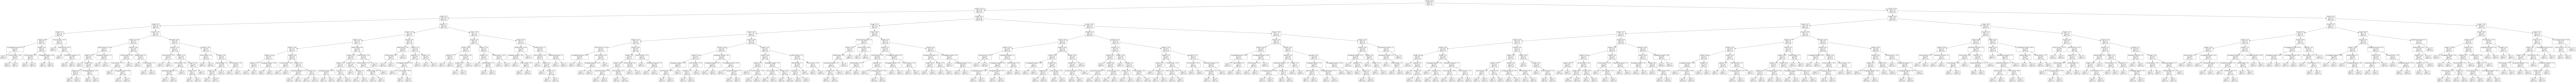

In [42]:
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT data for the 10th Decision Tree in AdaBoost
dot_data=tree.export_graphviz(Regmodel.estimators_[2], out_file=None, feature_names=Predictors, class_names=Targetvariable)
# Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

XG BOOSt

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=None, max_depth=10,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[18:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror

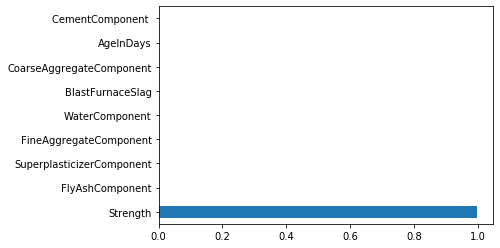

In [43]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
Regmodel=XGBRegressor(max_depth=10, n_estimators=500, learning_rate=0.2, objective='reg:linear', booster='gbtree')

print(Regmodel)
# Creating the model on Training Data
XGB=Regmodel.fit(x_train, y_train)
prediction=XGB.predict(x_test)
# Measuring Goodness of fit in Training data
from sklearn import metrics
print('The R2 value:',metrics.r2_score(y_train, XGB.predict(x_train)))
# Measuring accuracy on Testing Data
print('The Accuracy:', 100- np.mean(np.abs(y_test - prediction)/y_test*100))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=x_test, columns= Predictors)
Testingdataframe[Targetvariable]=y_test
Testingdataframe[('Predicted'+ Targetvariable)]=np.round(prediction)
#Measuring Average Percentage Error
Testingdataframe['APE']=abs(Testingdataframe[Targetvariable]-Testingdataframe[('Predicted'+ Targetvariable)])/Testingdataframe[Targetvariable]*100
MAPE=np.mean(Testingdataframe['APE'])
MedianAPE=np.median(Testingdataframe['APE'])

MeanAccuracy=100 - MAPE
MedianAccuracy=100 - MedianAPE
print('MeanAccuracy',MeanAccuracy)
print('MedianAccuracy',MedianAccuracy)

Plotting a single Decision tree out of XGBoost

XGboost is not yet implemented under graphviz, hence we use its own method to plot it

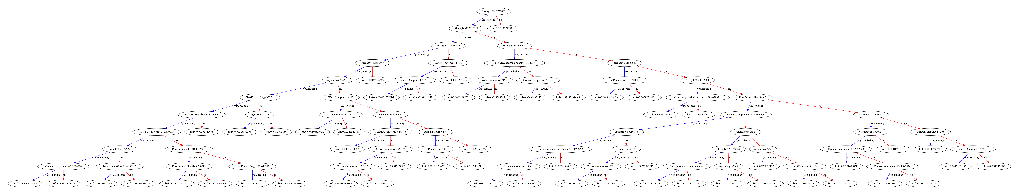

In [44]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, subplot=plt.subplots(figsize=(18,8))
plot_tree(XGB, num_trees=50, ax=subplot)

KNN

In [45]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
Regmodel=KNeighborsRegressor(n_neighbors=7)

print(Regmodel)
# Creating the model on Training Data
KNN=Regmodel.fit(x_train, y_train)
prediction=KNN.predict(x_test)
# Measuring Goodness of fit in Training data
from sklearn import metrics
print('The R2 value:',metrics.r2_score(y_train, KNN.predict(x_train)))
# Measuring accuracy on Testing Data
print('The Accuracy:', 100- np.mean(np.abs(y_test - prediction)/y_test*100))
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=x_test, columns= Predictors)
Testingdataframe[Targetvariable]=y_test
Testingdataframe[('Predicted'+ Targetvariable)]=np.round(prediction)
#Measuring Average Percentage Error
Testingdataframe['APE']=abs(Testingdataframe[Targetvariable]-Testingdataframe[('Predicted'+ Targetvariable)])/Testingdataframe[Targetvariable]*100
MAPE=np.mean(Testingdataframe['APE'])
MedianAPE=np.median(Testingdataframe['APE'])

MeanAccuracy=100 - MAPE
MedianAccuracy=100 - MedianAPE
print('MeanAccuracy',MeanAccuracy)
print('MedianAccuracy',MedianAccuracy)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')
The R2 value: 0.7934900773432312
The Accuracy: 76.39141907249379
MeanAccuracy 76.28144925782846
MedianAccuracy 84.69626168224299


Accuracy of Different ML Algorithm

LinearRegression
The Accuracy: 49.581989430254495
Multiple Linear Regression
The Accuracy: 99.99999999999993
Decision Tree
Accuracy of the data: 97.43733123806467
RandomForestRegressor
The Accuracy: 99.40647535520425
AdaBoostRegressor
The Accuracy: 99.24504473614486
XGBRegressor
The Accuracy: 99.30598882201028
KNeighborsRegressor
The Accuracy: 76.39141907249379

Best MOdel= MLR, RF, ADB, XGB